In [1]:
#* https://github.com/bab2min/Kiwi

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import re

c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
path = 'C:\\Users\\lucky\\Documents\\COLLABORATION\\AirbnbWise\\Pipeline\\jieun'
rpath1 = os.path.join(path, 'total_translate_review.csv')
rpath3 = os.path.join(path, 'sentiment.csv')
rpath4 = os.path.join(path, 'review_token.csv')
r3 = pd.read_csv(rpath3)
r4 = pd.read_csv(rpath4)

In [4]:
def preprocessed(text):
    # 한국어 텍스트만 남기고 나머지는 공백으로 대체
    text = re.sub(r'[^가-힣 ]', ' ', text)
    # 작은따옴표(') 제거
    text = text.replace("'", '')
    # 연속된 공백을 하나의 공백으로 대체하고 양쪽 공백 제거
    text = ' '.join(text.split())

    return text

In [5]:
filtered_comment = list(map(preprocessed, r3['kr_comments']))
filtered_comment

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

In [6]:
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type='sbg', typos='basic', typo_cost_threshold = 2.5)

In [7]:
space_comments = kiwi.space(filtered_comment, reset_whitespace=True)
space_comments = list(filtered_comment)
space_comments[:5]

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

In [8]:
split_result = kiwi.split_into_sents(space_comments, return_tokens = True)
split_result = list(split_result)
split_result[:3]

[[Sentence(text='더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다', start=0, end=40, tokens=[Token(form='더', tag='MAG', start=0, len=1), Token(form='하', tag='XSV', start=1, len=1), Token(form='ᆯ', tag='ETM', start=1, len=1), Token(form='나위', tag='NNB', start=3, len=2), Token(form='없이', tag='MAG', start=6, len=2), Token(form='아파트', tag='NNG', start=9, len=3), Token(form='자체', tag='NNG', start=13, len=2), Token(form='가', tag='JKS', start=15, len=1), Token(form='훌륭', tag='XR', start=17, len=2), Token(form='하', tag='XSA', start=19, len=1), Token(form='고', tag='EC', start=20, len=1), Token(form='필요', tag='NNG', start=22, len=2), Token(form='하', tag='XSA', start=24, len=1), Token(form='ᆫ', tag='ETM', start=24, len=1), Token(form='모든', tag='MM', start=26, len=2), Token(form='것', tag='NNB', start=29, len=1), Token(form='이', tag='JKS', start=30, len=1), Token(form='갖추', tag='VV', start=32, len=2), Token(form='어', tag='EC', start=33, len=1), Token(form='지', tag='VX', start=34, len=1), Token(form='어', ta

In [9]:
text = []
token = []
for comment in split_result:
    text.extend([sentence[0] for sentence in comment])
    token.extend([sentence[3] for sentence in comment])


sentence_df = pd.DataFrame(
    {
        'text' : text,
        'token' : token
    }
)
sentence_df

,text,token
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다,"[(더, MAG, 0, 1), (하, XSV, 1, 1), (ᆯ, ETM, 1, 1..."
1,게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼...,"[(게다가, MAG, 41, 3), (동네, NNG, 45, 2), (자체, NNG..."
2,처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다,"[(처음, NNG, 114, 2), (부터, JX, 116, 2), (집, NNG,..."
3,아파트는 사진에서 보이는 것보다 더 넓습니다,"[(아파트, NNG, 0, 3), (는, JX, 3, 1), (사진, NNG, 5,..."
4,커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다,"[(커플, NNG, 25, 2), (에게, JKB, 27, 2), (적합, NNG,..."
...,...,...
518130,도로 옆에 있는 건물이었습니다만 밤의 소음은 신경이 쓰이지 않았습니다,"[(도로, NNG, 171, 2), (옆, NNG, 174, 1), (에, JKB,..."
518131,무엇보다 호스트 쪽의 대응이 훌륭하고 여행의 질이 올랐습니다,"[(무엇, NP, 210, 2), (보다, JKB, 212, 2), (호스트, NN..."
518132,꼭 또 이용하고 싶습니다,"[(꼭, MAG, 244, 1), (또, MAG, 246, 1), (이용, NNG,..."
518133,매우 편안한 방이었습니다,"[(매우, MAG, 0, 2), (편안, NNG, 3, 2), (하, XSA, 5,..."


In [10]:
nouns = []
verbs = []
neg_verbs = []
radixs = []

for morphs in sentence_df['token']:
    nouns.append([(noun[0], noun[1]) for noun in morphs if noun[1] in ['NNG', 'NNP']])
    neg_verbs.append([morphs for noun in morphs if noun[1] in ['VCN']])
    verbs.append([(verb[0]+'다', verb[1]) for verb in morphs if verb[1] in ['VA', 'VV', 'VX']])
    radixs.append([(verb[0], verb[1]) for verb in morphs if verb[1] in ['XR']])

sentence_df['verbs'] = verbs
sentence_df['nouns'] = nouns
sentence_df['radixs'] = radixs


In [11]:
from itertools import chain
from collections import Counter
import ast
def split_word(df, row):
    if type(df[row][0]) == str:
        target =  df[row].apply(ast.literal_eval)
    else:
        target = df[row]
    word_list = [word[0] for words in target for word in words]
    return word_list
def count_words(word_list):
    word_counts = Counter(word_list)
    # sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return word_counts

In [12]:
verbs_list = split_word(sentence_df, 'verbs')
nouns_list = split_word(sentence_df, 'nouns')
radixs_list = split_word(sentence_df, 'radixs')

verbs_counts = count_words(verbs_list)
nouns_counts = count_words(nouns_list)
radixs_counts = count_words(radixs_list)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px

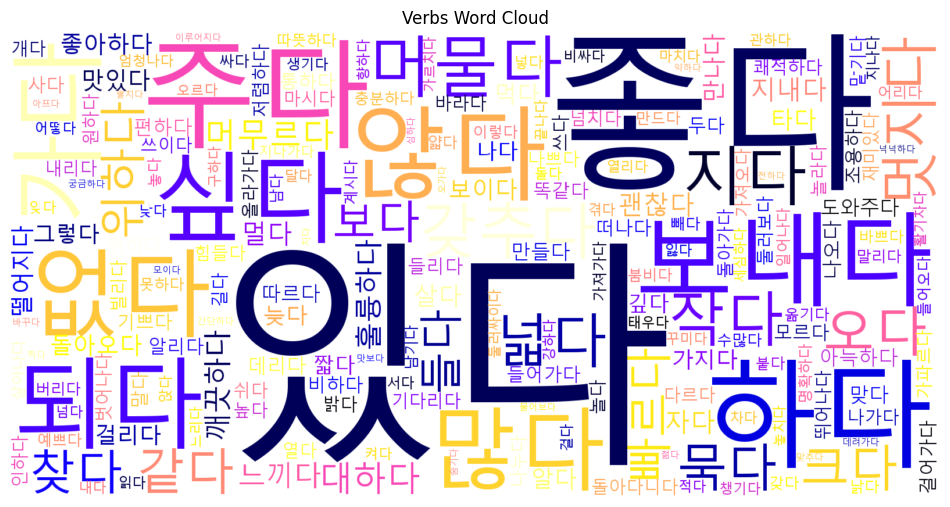

In [14]:

palettes = ['spring', 'summer', 'seismic','PuBu']

def generate_word_cloud(data, font_path, title, color=None):
    wordcloud = WordCloud(width=800, height=400,
                          max_words=200,
                          scale=2,
                          random_state=42,
                          background_color='white',
                          colormap = color,
                          font_path=font_path).generate_from_frequencies(data)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

font_path = 'C:/Windows/Fonts/malgun.ttf'
generate_word_cloud(verbs_counts, font_path, 'Verbs Word Cloud', 'gnuplot2')

In [15]:
sorted_verbs = sorted(verbs_counts.items(), key=lambda x: x[1], reverse=True)
sorted_nouns = sorted(nouns_counts.items(), key=lambda x: x[1], reverse=True)
sorted_radixs = sorted(radixs_counts.items(), key=lambda x: x[1], reverse=True)


In [16]:
import plotly.graph_objects as go

def generate_treemap(labels, values, title):
    fig = go.Figure(go.Treemap(
        labels=labels[:30],  # You can adjust the number of labels displayed
        parents=[''] * len(labels[:30]),
        values=values,
        texttemplate="%{label}<br>%{value}",
        hoverinfo='label+value',
    ))

    fig.update_layout(
        title=title,
        margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins for better layout
    )

    fig.show()


label, counts = zip(*sorted_verbs)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')
